## Группировка значений

In [3]:
import pandas as pd

C:\Users\mi\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\mi\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\mi\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
data = pd.read_csv("Бестселлеры.csv")
data

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


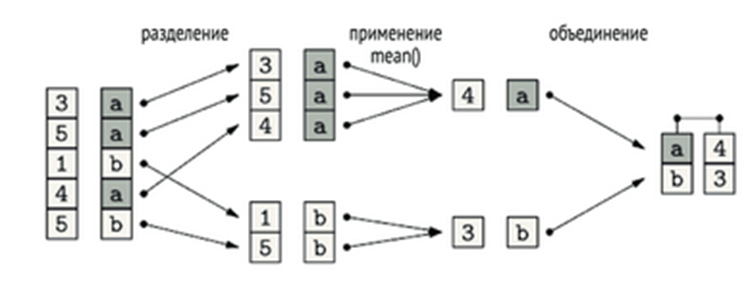

Количество художественной и научной литературы

In [5]:
data.groupby("Genre")["Name"].count()

Genre
Fiction        240
Non Fiction    310
Name: Name, dtype: int64

In [7]:
data.groupby(["Genre", "Author"])["Name"].count()

Genre        Author          
Fiction      Abraham Verghese    2
             Adam Mansbach       1
             Adir Levy           1
             Alan Moore          1
             Alex Michaelides    1
                                ..
Non Fiction  Tucker Carlson      1
             W. Cleon Skousen    1
             Walter Isaacson     3
             William Davis       2
             Zhi Gang Sha        2
Name: Name, Length: 250, dtype: int64

Объект groupby интерируемый, а это значит, что с ним можно работать через оператор for

In [14]:
for group, items in data.groupby(["Genre", "Author"]):
    print(group, items.shape)

('Fiction', 'Abraham Verghese') (2, 7)
('Fiction', 'Adam Mansbach') (1, 7)
('Fiction', 'Adir Levy') (1, 7)
('Fiction', 'Alan Moore') (1, 7)
('Fiction', 'Alex Michaelides') (1, 7)
('Fiction', 'Alice Schertle') (1, 7)
('Fiction', 'Amor Towles') (1, 7)
('Fiction', 'Andy Weir') (1, 7)
('Fiction', 'Angie Thomas') (1, 7)
('Fiction', 'Ann Whitford Paul') (2, 7)
('Fiction', 'Anthony Doerr') (2, 7)
('Fiction', 'Audrey Niffenegger') (1, 7)
('Fiction', 'B. J. Novak') (2, 7)
('Fiction', 'Bill Martin Jr.') (2, 7)
('Fiction', 'Celeste Ng') (1, 7)
('Fiction', 'Charlaine Harris') (4, 7)
('Fiction', 'Chris Cleave') (1, 7)
('Fiction', 'Christina Baker Kline') (1, 7)
('Fiction', 'Christopher Paolini') (1, 7)
('Fiction', 'Craig Smith') (2, 7)
('Fiction', 'DK') (1, 7)
('Fiction', 'Dan Brown') (3, 7)
('Fiction', 'Dav Pilkey') (7, 7)
('Fiction', 'Deborah Diesen') (2, 7)
('Fiction', 'Delia Owens') (1, 7)
('Fiction', 'Donna Tartt') (2, 7)
('Fiction', 'Dr. Seuss') (9, 7)
('Fiction', 'Drew Daywalt') (3, 7)
('Fic

Выдать определённую группу

In [8]:
data.groupby(["Genre", "Author"]).get_group(("Fiction", "Abraham Verghese"))

,Name,Author,User Rating,Reviews,Price,Year,Genre
56,Cutting for Stone,Abraham Verghese,4.6,4866,11,2010,Fiction
57,Cutting for Stone,Abraham Verghese,4.6,4866,11,2011,Fiction


Применяет к каждому столбцу свою агрегирующую функцию

In [20]:
data.groupby(["Genre", "Author"]).agg({"Name": "count", 
                                       "Author": len, 
                                       "User Rating": "min", 
                                       "Reviews": "mean", 
                                       "Price": "sum", 
                                       "Year": "last"})

Name  Author  User Rating       Reviews  Price  \
Genre       Author                                                             
Fiction     Abraham Verghese     2       2          4.6   4866.000000     22   
            Adam Mansbach        1       1          4.8   9568.000000      9   
            Adir Levy            1       1          4.8   8170.000000     13   
            Alan Moore           1       1          4.8   3829.000000     42   
            Alex Michaelides     1       1          4.5  27536.000000     14   
...                            ...     ...          ...           ...    ...   
Non Fiction Tucker Carlson       1       1          4.8   3923.000000     16   
            W. Cleon Skousen     1       1          4.8   1680.000000     12   
            Walter Isaacson      3       3          4.5   6222.666667     61   
            William Davis        2       2          4.4   7497.000000     12   
            Zhi Gang Sha         2       2          4.6    128.500000     23   

                              Year  
Genre       Author                  
Fiction     Abraham Verghese  2011  
            Adam Mansbach     2011  
            Adir Levy         2019  
            Alan Moore        2009  
            Alex Michaelides  2019  
...                            ...  
Non Fiction Tucker Carlson    2018  
            W. Cleon Skousen  2009  
            Walter Isaacson   2012  
            William Davis     2013  
            Zhi Gang Sha      2013  

[250 rows x 6 columns]

Функция transform

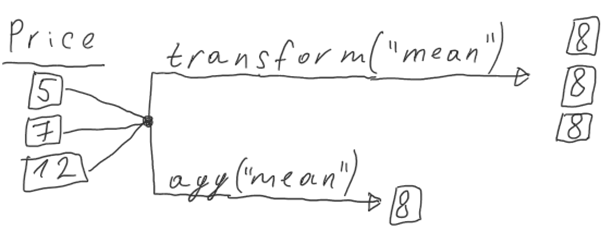

In [29]:
data.groupby("Author")["Price"].transform("mean")

0       8.00
1      16.75
2      15.00
3       6.00
4      12.00
       ...  
545     9.25
546     8.00
547     8.00
548     8.00
549     8.00
Name: Price, Length: 550, dtype: float64

Пример расчёта отклонения цены книги от общегрупповой цены

In [38]:
data["deviation"] = data["Price"] - data.groupby("Author")["Price"].transform("mean")
data

,Name,Author,User Rating,Reviews,Price,Year,Genre,mm,deviation
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,8,0.00
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,22,5.25
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,15,0.00
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,6,0.00
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,12,0.00
...,...,...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction,111,-1.25
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction,8,0.00
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction,16,0.00
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction,24,0.00


----

Пример заполнения пропусков общегрупповым средним

In [42]:
data = pd.DataFrame({"Label": list("ABABAB"), "Values": [10, 22, 9, None, 12, 15]})
data

,Label,Values
0,A,10.0
1,B,22.0
2,A,9.0
3,B,NaN
4,A,12.0
5,B,15.0


In [43]:
data.groupby("Label").transform(lambda x: x.fillna(x.mean()))

,Values
0,10.0
1,22.0
2,9.0
3,18.5
4,12.0
5,15.0


Функция filter отбирает только те группы, которые удовлетворяют условиям

In [47]:
data.groupby("Label").filter(lambda x: x["Values"].isnull().sum() == 0)

,Label,Values
0,A,10.0
2,A,9.0
4,A,12.0


In [51]:
data.groupby("Label").filter(lambda x: x["Values"].count() > 2)

,Label,Values
0,A,10.0
2,A,9.0
4,A,12.0
